In [3]:
import sys
sys.path.append('../')

import pandas as pd
import json

import stock_service as sv

In [4]:
sv.run().keys()

dict_keys(['meta_data', 'data_for_all_days'])

In [5]:
pd.json_normalize(sv.run()['meta_data']).T

,0
1. Information,Daily Prices and Volumes for Digital Currency
2. Digital Currency Code,BTC
3. Digital Currency Name,Bitcoin
4. Market Code,CNY
5. Market Name,Chinese Yuan
6. Last Refreshed,2020-12-27 00:00:00
7. Time Zone,UTC


In [6]:
pd.read_json(json.dumps(sv.run()['data_for_all_days'], ensure_ascii=False)).T

,1a. open (CNY),1b. open (USD),2a. high (CNY),2b. high (USD),3a. low (CNY),3b. low (USD),4a. close (CNY),4b. close (USD),5. volume,6. market cap (USD)
2020-12-27,173314.524120,26493.40,175451.076000,26820.00,173281.880538,26488.41,174877.818066,26732.37,4431.985068,4431.985068
2020-12-26,161664.036246,24712.47,175758.736854,26867.03,160274.100000,24500.00,173314.458702,26493.39,97806.513386,97806.513386
2020-12-25,155230.306782,23728.99,162170.306148,24789.86,153297.924480,23433.60,161664.036246,24712.47,79519.943569,79519.943569
2020-12-24,151981.648902,23232.39,155658.402174,23794.43,148521.232956,22703.42,155231.680560,23729.20,69013.834252,69013.834252
2020-12-23,155765.426022,23810.79,157657.380000,24100.00,147844.680000,22600.00,151984.069368,23232.76,119047.259733,119047.259733
...,...,...,...,...,...,...,...,...,...,...
2018-04-07,43184.973102,6601.39,46250.526000,7070.00,43086.126504,6586.28,45110.944440,6895.80,32269.578267,32269.578267
2018-04-06,44287.986000,6770.00,44811.330000,6850.00,42521.700000,6500.00,43184.973102,6601.39,27455.011920,27455.011920
2018-04-05,44458.726980,6796.10,45151.503600,6902.00,42957.972642,6566.69,44292.957768,6770.76,39029.731460,39029.731460
2018-04-04,48443.402778,7405.21,48589.350336,7427.52,43875.852600,6707.00,44458.726980,6796.10,42227.183804,42227.183804


In [7]:
data_for_all_days = pd.json_normalize(sv.run()['data_for_all_days']).T

In [8]:
data_for_all_days.head()

,0
2020-12-27.1a. open (CNY),173314.52412000
2020-12-27.1b. open (USD),26493.40000000
2020-12-27.2a. high (CNY),175451.07600000
2020-12-27.2b. high (USD),26820.00000000
2020-12-27.3a. low (CNY),173281.88053800


In [9]:
data_for_all_days.columns = ['value']

In [10]:
# data
data_for_all_days['date'] = pd.to_datetime(data_for_all_days.index.map(lambda x: x[:10] if len(x) <= 26 else None))

# category
data_for_all_days['category'] =  data_for_all_days.index.map(lambda x: x[11:13] if len(x) <= 26 else None)

# status
data_for_all_days['status'] =  data_for_all_days.index.map(lambda x: x[15:18] if len(x) <= 26 else None)
adjust_dict_status = dict(
    ope = 'open',
    hig = 'high',
    clo = 'close',
    olu = 'volume'
)
data_for_all_days['status'] = data_for_all_days['status'].replace(adjust_dict_status)

# coin conversion
def get_coin(string : str):
    index_parenteses = string.find('(')
    if index_parenteses > 0:
        return string[index_parenteses+1:index_parenteses+4]
    return 'BTC'
data_for_all_days['coin_conversion'] = data_for_all_days.index.map(lambda x: get_coin(x) if len(x) <= 26 else None)

In [11]:
data_for_all_days.head(10)

,value,date,category,status,coin_conversion
2020-12-27.1a. open (CNY),173314.52412000,2020-12-27,1a,open,CNY
2020-12-27.1b. open (USD),26493.40000000,2020-12-27,1b,open,USD
2020-12-27.2a. high (CNY),175451.07600000,2020-12-27,2a,high,CNY
2020-12-27.2b. high (USD),26820.00000000,2020-12-27,2b,high,USD
2020-12-27.3a. low (CNY),173281.88053800,2020-12-27,3a,low,CNY
2020-12-27.3b. low (USD),26488.41000000,2020-12-27,3b,low,USD
2020-12-27.4a. close (CNY),174877.81806600,2020-12-27,4a,close,CNY
2020-12-27.4b. close (USD),26732.37000000,2020-12-27,4b,close,USD
2020-12-27.5. volume,4431.98506800,2020-12-27,5.,volume,BTC
2020-12-27.6. market cap (USD),4431.98506800,NaT,None,None,None


In [12]:
data_for_all_days = data_for_all_days.dropna()
data_for_all_days.index = data_for_all_days.date

In [13]:
data_for_all_days_usd = data_for_all_days.loc[data_for_all_days.coin_conversion == 'USD']
data_for_all_days_cny = data_for_all_days.loc[data_for_all_days.coin_conversion == 'CNY']

In [14]:
temp_df =  pd.DataFrame()
temp_df['open'] = data_for_all_days_usd.loc[data_for_all_days_usd.status == 'open'].value
temp_df['high'] = data_for_all_days_usd.loc[data_for_all_days_usd.status == 'high'].value
temp_df['low'] = data_for_all_days_usd.loc[data_for_all_days_usd.status == 'low'].value
temp_df['close'] = data_for_all_days_usd.loc[data_for_all_days_usd.status == 'close'].value
temp_df.index = data_for_all_days_usd.loc[data_for_all_days_usd.status == 'open'].index

In [15]:
data_for_all_days_usd = temp_df

In [16]:
import matplotlib.dates as mpl_dates
from mpl_finance import candlestick_ohlc
data_for_all_days_usd['date'] = data_for_all_days_usd.index
data_for_all_days_usd['date'] = data_for_all_days_usd['date'].apply(mpl_dates.date2num)
data_for_all_days_usd = data_for_all_days_usd.astype(float)

In [17]:
data_for_all_days_usd

,open,high,low,close,date
date,,,,,
2020-12-27,26493.40,26820.00,26488.41,26732.37,737786.0
2020-12-26,24712.47,26867.03,24500.00,26493.39,737785.0
2020-12-25,23728.99,24789.86,23433.60,24712.47,737784.0
2020-12-24,23232.39,23794.43,22703.42,23729.20,737783.0
2020-12-23,23810.79,24100.00,22600.00,23232.76,737782.0
...,...,...,...,...,...
2018-04-07,6601.39,7070.00,6586.28,6895.80,736791.0
2018-04-06,6770.00,6850.00,6500.00,6601.39,736790.0
2018-04-05,6796.10,6902.00,6566.69,6770.76,736789.0


In [18]:
data_for_all_days_usd = data_for_all_days_usd[['date', 'open', 'high', 'low', 'close']]

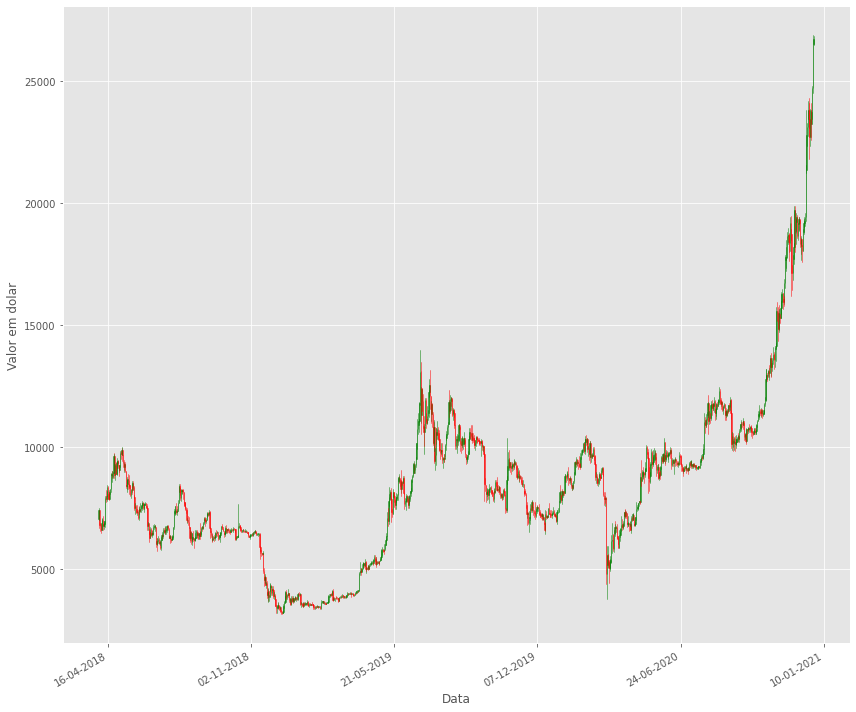

In [19]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from mpl_finance import candlestick_ohlc

def plot_candle(df):
    
    # Creating Subplots
    fig, ax = plt.subplots(figsize=(12,10))

    candlestick_ohlc(ax, 
                     df.values, 
                     width=0.6, 
                     colorup='green', 
                     colordown='red', 
                     alpha=0.8)

    # Setting labels & titles
    ax.set_xlabel('Data')
    ax.set_ylabel('Valor em dolar')

    # Formatting Date
    date_format = mpl_dates.DateFormatter('%d-%m-%Y')
    ax.xaxis.set_major_formatter(date_format)
    fig.autofmt_xdate()

    fig.tight_layout()

    return plt.show()

plot_candle(data_for_all_days_usd)

In [20]:
data_for_all_days_usd.index.year

Int64Index([2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020,
            ...
            2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018],
           dtype='int64', name='date', length=1000)

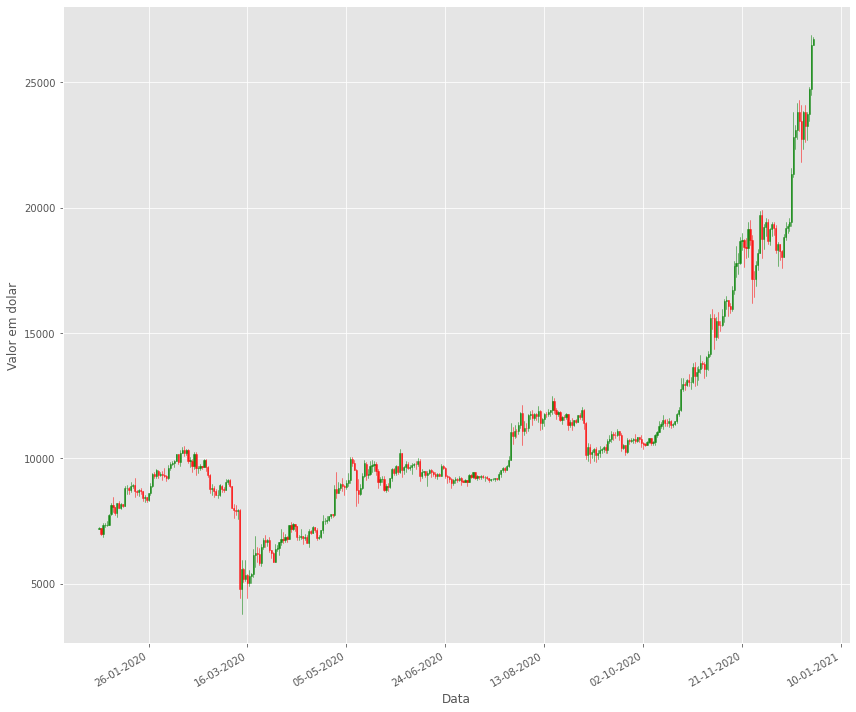

In [21]:
df_2020 = data_for_all_days_usd.loc[data_for_all_days_usd.index.year == 2020]
plot_candle(df_2020)

In [22]:
df_2020.index.month

Int64Index([12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
            ...
             1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
           dtype='int64', name='date', length=362)

In [23]:
df_jun_2020 = df_2020.loc[df_2020.index.month >= 6]

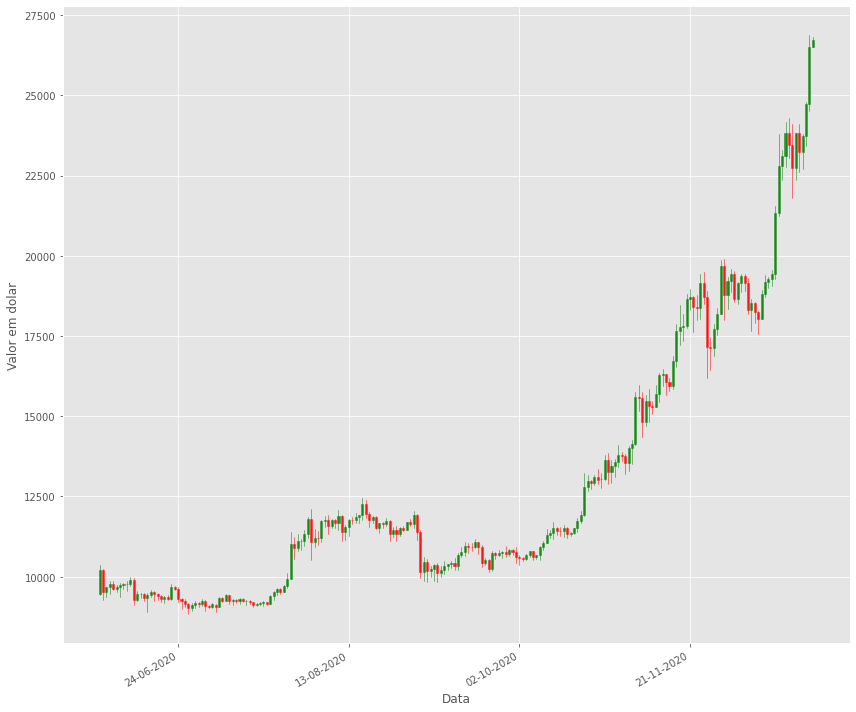

In [24]:
plot_candle(df_jun_2020)